In [2]:
import numpy as np
from sparse_shift.datasets import sample_nonlinear_icp_sim, sample_cdnod_sim
from sparse_shift.testing import test_mechanism_shifts
import pandas as pd
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
PARAMS_DICT = {
    'nonlinearity': ['cubic'],
    'noise_df': [100],
    'intervention': [
        'soft',
        # lambda X: np.sin(2*np.pi*X),
        # lambda X: np.sin(X) * np.sqrt(np.abs(X))
    ],
    'combination': ['additive'],
    'intervention_shift': [1],
    'intervention_scale': [0],
    'pre_intervention': [False],
    'lambda_noise': [
        # None,
        lambda X: 1 * X,
        # lambda X: np.abs(X)
    ],
    'intervention_targets': [
        [None, 0],
        [None, 1],
    ]
}

n_samples = 100

# Parents
dag_dict = {
    'XY': np.asarray([[0, 1], [0, 0]]),
    'YX': np.asarray([[0, 0], [1, 0]])
}

TRUE_PARENTS = dag_dict['YX']

param_keys, param_values = zip(*PARAMS_DICT.items())
params_grid = [dict(zip(param_keys, v)) for v in itertools.product(*param_values)]

dag_keys, dags = zip(*dag_dict.items())

In [5]:
for i, params in enumerate(params_grid):
    intervention_targets = params.pop('intervention_targets')
    print(intervention_targets)
    Xs = [
        sample_nonlinear_icp_sim(
            TRUE_PARENTS,
            n_samples=n_samples,
            intervention_targets=targets,
            # random_state=len(intervention_targets)+j,
            **params
        )
        for j, targets in enumerate(intervention_targets)
    ]
    
    for dag in dag_dict.values():
        print(dag)
        num_shifts, pvalues_mat = test_mechanism_shifts(Xs, dag, reps=100, n_jobs=-2)
        print(pvalues_mat[:, 0, 1])

    df = pd.DataFrame(
        np.hstack((
            np.vstack(Xs),
            np.hstack([[i]*X.shape[0] for i, X in enumerate(Xs)]).reshape(-1, 1).astype(int)
        )),
        columns=[f'X{i+1}' for i in range(Xs[0].shape[1])] + ['y']
    )
    sns.pairplot(df, hue='y', diag_kind='kde')
    plt.show()

[None, 0]


TypeError: sample_nonlinear_icp_sim() got an unexpected keyword argument 'functions'

In [12]:
PARAMS_DICT = {
    'functions': [
        [lambda x: x],
        [lambda x: x**3],
        [np.tanh],
        [np.sinc],
    ],
    'intervention_targets': [
        [None, 0],
        [None, 1],
    ]
}

n_samples = 100

# Parents
dag_dict = {
    'XY': np.asarray([[0, 1], [0, 0]]),
    'YX': np.asarray([[0, 0], [1, 0]])
}

TRUE_PARENTS = dag_dict['YX']

param_keys, param_values = zip(*PARAMS_DICT.items())
params_grid = [dict(zip(param_keys, v)) for v in itertools.product(*param_values)]

dag_keys, dags = zip(*dag_dict.items())

[None, 0] [<function <lambda> at 0x7fa5ee87bdc0>]
[[0 1]
 [0 0]]


/Users/rflperry/opt/miniconda3/envs/kcd/lib/python3.8/site-packages/hyppo/tools/common.py:45: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)
/Users/rflperry/opt/miniconda3/envs/kcd/lib/python3.8/site-packages/hyppo/tools/common.py:45: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)


[0.47524752 0.31592818]
[[0 0]
 [1 0]]
[6.23105953e-05 1.28712871e-01]


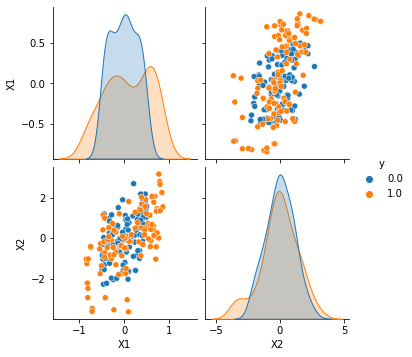

[None, 1] [<function <lambda> at 0x7fa5ee87bdc0>]
[[0 1]
 [0 0]]


/Users/rflperry/opt/miniconda3/envs/kcd/lib/python3.8/site-packages/hyppo/tools/common.py:45: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)
/Users/rflperry/opt/miniconda3/envs/kcd/lib/python3.8/site-packages/hyppo/tools/common.py:45: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)


[2.27722772e-01 6.16231400e-05]
[[0 0]
 [1 0]]
[0.14112013 0.00990099]


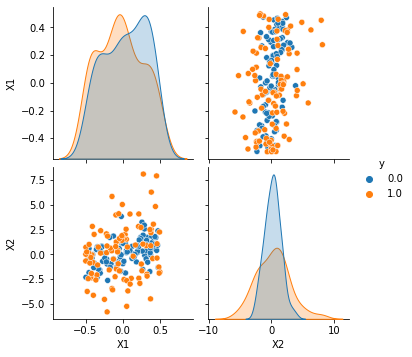

[None, 0] [<function <lambda> at 0x7fa5ed230790>]
[[0 1]
 [0 0]]
[0.46534653 0.30160038]
[[0 0]
 [1 0]]


/Users/rflperry/opt/miniconda3/envs/kcd/lib/python3.8/site-packages/hyppo/tools/common.py:45: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)
/Users/rflperry/opt/miniconda3/envs/kcd/lib/python3.8/site-packages/hyppo/tools/common.py:45: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)


[0.00534155 0.5049505 ]


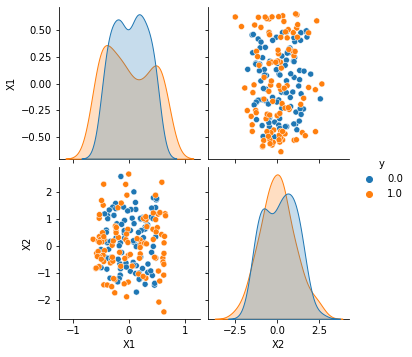

[None, 1] [<function <lambda> at 0x7fa5ed230790>]
[[0 1]
 [0 0]]


/Users/rflperry/opt/miniconda3/envs/kcd/lib/python3.8/site-packages/hyppo/tools/common.py:45: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)
/Users/rflperry/opt/miniconda3/envs/kcd/lib/python3.8/site-packages/hyppo/tools/common.py:45: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)


[8.01980198e-01 3.94560188e-05]
[[0 0]
 [1 0]]
[0.25625271 0.00990099]


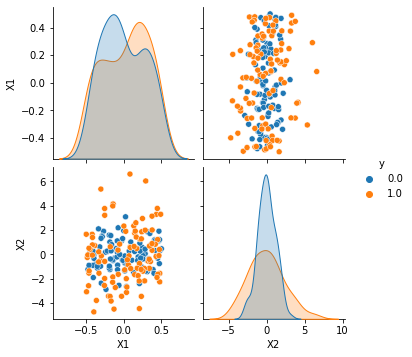

[None, 0] [<ufunc 'tanh'>]
[[0 1]
 [0 0]]


/Users/rflperry/opt/miniconda3/envs/kcd/lib/python3.8/site-packages/hyppo/tools/common.py:45: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)
/Users/rflperry/opt/miniconda3/envs/kcd/lib/python3.8/site-packages/hyppo/tools/common.py:45: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)


[0.20792079 0.0024271 ]
[[0 0]
 [1 0]]
[3.91538653e-15 3.86138614e-01]


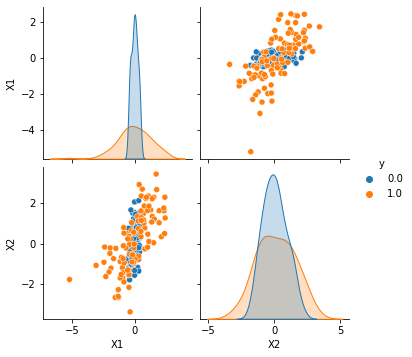

[None, 1] [<ufunc 'tanh'>]
[[0 1]
 [0 0]]


/Users/rflperry/opt/miniconda3/envs/kcd/lib/python3.8/site-packages/hyppo/tools/common.py:45: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)
/Users/rflperry/opt/miniconda3/envs/kcd/lib/python3.8/site-packages/hyppo/tools/common.py:45: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)


[4.15841584e-01 2.47263449e-09]
[[0 0]
 [1 0]]
[1.         0.00990099]


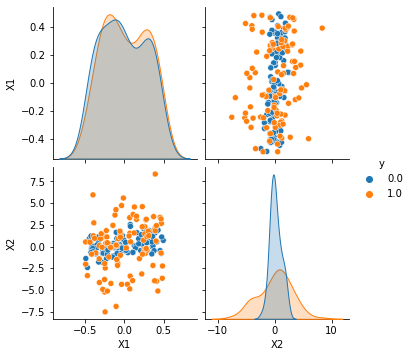

[None, 0] [<function sinc at 0x7fa5e84cc700>]
[[0 1]
 [0 0]]
[7.92079208e-02 5.95717780e-06]
[[0 0]
 [1 0]]


/Users/rflperry/opt/miniconda3/envs/kcd/lib/python3.8/site-packages/hyppo/tools/common.py:45: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)
/Users/rflperry/opt/miniconda3/envs/kcd/lib/python3.8/site-packages/hyppo/tools/common.py:45: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)


[3.97956139e-14 5.94059406e-02]


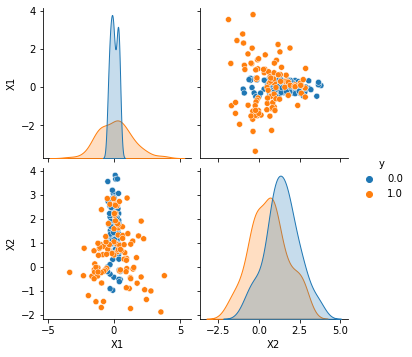

[None, 1] [<function sinc at 0x7fa5e84cc700>]
[[0 1]
 [0 0]]


/Users/rflperry/opt/miniconda3/envs/kcd/lib/python3.8/site-packages/hyppo/tools/common.py:45: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)
/Users/rflperry/opt/miniconda3/envs/kcd/lib/python3.8/site-packages/hyppo/tools/common.py:45: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)


[4.05940594e-01 4.18060607e-06]
[[0 0]
 [1 0]]
[0.22970517 0.00990099]


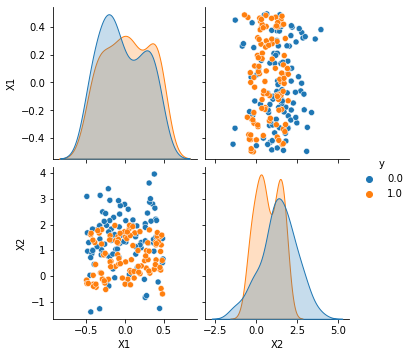

/Users/rflperry/opt/miniconda3/envs/kcd/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rflperry/opt/miniconda3/envs/kcd/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

In [13]:
for i, params in enumerate(params_grid):
    intervention_targets = params.pop('intervention_targets')
    print(intervention_targets, params['functions'])
    Xs = [
        sample_cdnod_sim(
            TRUE_PARENTS,
            n_samples=n_samples,
            intervention_targets=targets,
            base_random_state=0,
            **params
        )
        for j, targets in enumerate(intervention_targets)
    ]
    
    for dag in dag_dict.values():
        print(dag)
        num_shifts, pvalues_mat = test_mechanism_shifts(Xs, dag, reps=100, n_jobs=-2)
        print(pvalues_mat[:, 0, 1])

    df = pd.DataFrame(
        np.hstack((
            np.vstack(Xs),
            np.hstack([[i]*X.shape[0] for i, X in enumerate(Xs)]).reshape(-1, 1).astype(int)
        )),
        columns=[f'X{i+1}' for i in range(Xs[0].shape[1])] + ['y']
    )
    sns.pairplot(df, hue='y', diag_kind='kde')
    plt.show()